Consider the attached dataset
IRIS attached below. Load the dataset using the seaborn library function as per the attached link. There are 150 data points in this dataset and 3 different species.
1. Estimate the covariance matrix of the 4 attributes.

2. Estimate the four principal components of the data.

3. Perform dimensionality reduction using PCA to reduce 150 data points into two dimensions and three dimensions.

4. Visualize the reduced dimension 150 data points in 2D and 3D while giving different colors to reduced data points of diff different species.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = sns.load_dataset(name='iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
def summation(col):
  sonly=0
  for i in col:
    sonly+=i
  return sonly
def summation1(x,y):
  s_x_y=0
  for i in range(len(x)):
    s_x_y+=x[i]*y[i]
  return s_x_y
def summation2(x,y):
  s1=0
  s2=0
  for i in range(len(x)):
    s1+=x[i]
    s2+=y[i]
  return s1,s2
def summation3(x,y):
  s3=0
  s4=0
  for i in range(len(x)):
    s3+=x[i]**2
    s4+=y[i]**2
  return s3,s4
def covariance(x,y):
  s1,s2=summation2(x,y)
  s3,s4=summation3(x,y)
  cov=((summation1(x,y)/len(x))-((s1/len(x))*(s2/len(x))))
  return cov

In [ ]:
#finding the standard values
data = sns.load_dataset(name='iris')
def stand_data(col):
  standardized_data = (col - col.mean()) / np.std(col)
  return standardized_data
l=[]
s_d1=stand_data(data['sepal_length'])
s_d2=stand_data(data['sepal_width'])
s_d3=stand_data(data['petal_length'])
s_d4=stand_data(data['petal_width'])
l.append(s_d1)
l.append(s_d2)
l.append(s_d3)
l.append(s_d4)
data2=['sepal_length','sepal_width','petal_length','petal_width']
data1 = {'sepal_length': s_d1, 'sepal_width': s_d2, 'petal_length': s_d3,'petal_width': s_d4}
df = pd.DataFrame(data1)
print(df)

     sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]


In [ ]:
#Q1 the covariance matrix
cov_matrix=np.zeros((4,4))
for i in range(len(data2)):
  for j in range(len(data2)):
    cov=covariance(df[data2[i]], df[data2[j]])
    cov_matrix[i,j]=cov
dataf2=pd.DataFrame(cov_matrix,columns=data2,index=data2)
print(dataf2)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvectors=np.transpose(eigenvectors)
dataf3=pd.DataFrame({'eigen Values': eigenvalues,'Eigen Vectors': np.round(eigenvectors,4).tolist()},index=data2)
print(dataf3)
print('The 4 principle components :', np.round(eigenvalues,4).tolist())

              eigen Values                         Eigen Vectors
sepal_length      2.918498     [0.5211, -0.2693, 0.5804, 0.5649]
sepal_width       0.914030  [-0.3774, -0.9233, -0.0245, -0.0669]
petal_length      0.146757     [-0.7196, 0.2444, 0.1421, 0.6343]
petal_width       0.020715    [0.2613, -0.1235, -0.8014, 0.5236]
The 4 principle components : [2.9185, 0.914, 0.1468, 0.0207]


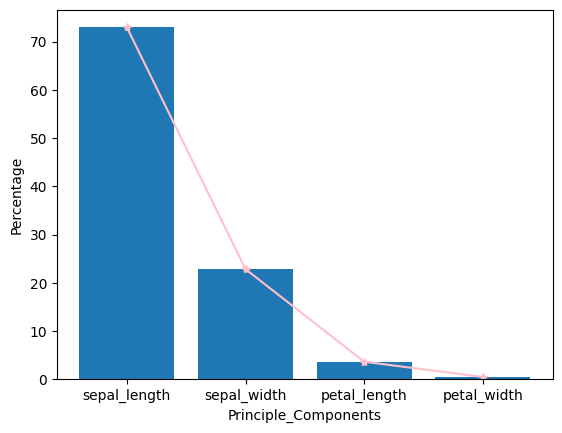

In [ ]:
lst=[]
for i in eigenvalues:
  lst.append((i/np.sum(eigenvalues))*100)
plt.bar(data2,lst)
plt.plot(data2,lst,color='pink',marker='*')
plt.xlabel('Principle_Components')
plt.ylabel('Percentage')
plt.show()

In [ ]:
#Q3 Perform dimensionality reduction to reduce 150 data points into two dimensions and three dimensions.
std_data=np.array(l)
std_data=np.transpose(l)
vectors_2d= eigenvectors.tolist()[0:2]
vectors_2d=np.array(vectors_2d)
vectors_2d=np.transpose(vectors_2d)
data3=np.dot(std_data,vectors_2d)
dataf3=np.transpose(data3)
df1 = pd.DataFrame(data3, columns=['PC1', 'PC2'])
print(df1)

          PC1       PC2
0   -2.264703 -0.480027
1   -2.080961  0.674134
2   -2.364229  0.341908
3   -2.299384  0.597395
4   -2.389842 -0.646835
..        ...       ...
145  1.870503 -0.386966
146  1.564580  0.896687
147  1.521170 -0.269069
148  1.372788 -1.011254
149  0.960656  0.024332

[150 rows x 2 columns]


In [ ]:
std_data=np.array(l)
std_data=np.transpose(l)
vectors_3d= eigenvectors.tolist()[0:3]
vectors_3d=np.array(vectors_3d)
vectors_3d=np.transpose(vectors_3d)
data4=np.dot(std_data,vectors_3d)
dataf4=np.transpose(data4)
df2 = pd.DataFrame(data4, columns=['PC1', 'PC2','PC3'])
print(df2)

          PC1       PC2       PC3
0   -2.264703 -0.480027 -0.127706
1   -2.080961  0.674134 -0.234609
2   -2.364229  0.341908  0.044201
3   -2.299384  0.597395  0.091290
4   -2.389842 -0.646835  0.015738
..        ...       ...       ...
145  1.870503 -0.386966  0.256274
146  1.564580  0.896687 -0.026371
147  1.521170 -0.269069  0.180178
148  1.372788 -1.011254  0.933395
149  0.960656  0.024332  0.528249

[150 rows x 3 columns]


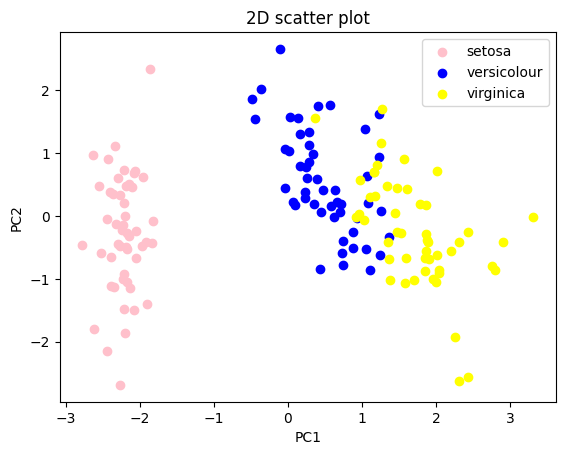

In [ ]:
#Q4 Visualize the reduced dimension 150 data points in 2D and 3D while giving different colors to reduced data points of diff different species.
p1=df1['PC1'][0:50]
p2=df1['PC2'][0:50]
p3=df1['PC1'][50:100]
p4=df1['PC2'][50:100]
p5=df1['PC1'][100:150]
p6=df1['PC2'][100:150]
plt.scatter(p1,p2,label='setosa',c='pink')
plt.scatter(p3,p4,label='versicolour',c='blue')
plt.scatter(p5,p6,label='virginica',c='yellow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D scatter plot')
plt.legend()
plt.show()

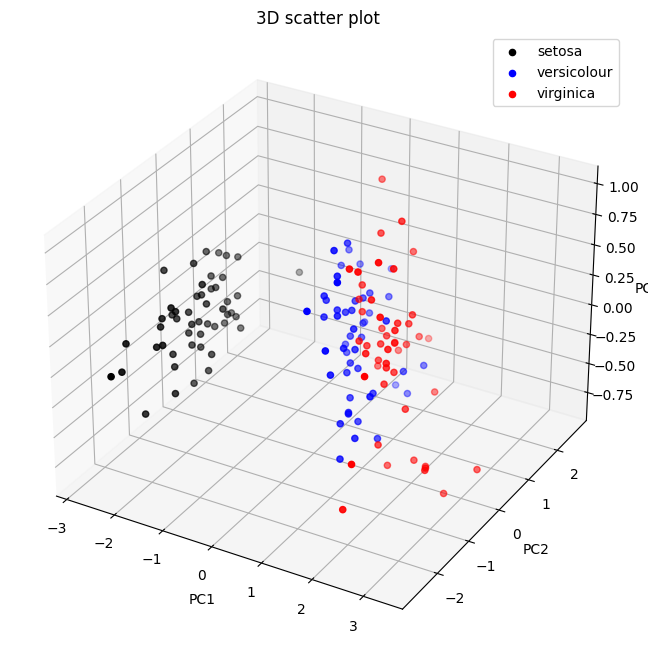

In [ ]:
fig = plt.figure(figsize = (15, 8))
ax = plt.axes(projection ="3d")
p1=df2['PC1'][0:50]
p2=df2['PC2'][0:50]
p3=df2['PC3'][0:50]
p4=df2['PC1'][50:100]
p5=df2['PC2'][50:100]
p6=df2['PC3'][50:100]
p7=df2['PC1'][100:150]
p8=df2['PC2'][100:150]
p9=df2['PC3'][100:150]
ax.scatter3D(p1,p2,p3,label='setosa',color='black')
ax.scatter3D(p4,p5,p6,label='versicolour',color='blue')
ax.scatter3D(p7,p8,p9,label='virginica',color='red')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D scatter plot')
ax.legend()
plt.show()